In [61]:
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get -f install -y
!google-chrome --version


(Reading database ... 126267 files and directories currently installed.)
Preparing to unpack google-chrome-stable_current_amd64.deb ...
Unpacking google-chrome-stable (137.0.7151.68-1) over (137.0.7151.68-1) ...
Setting up google-chrome-stable (137.0.7151.68-1) ...
Processing triggers for mailcap (3.70+nmu1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Google Chrome 137.0.7151.68 


In [62]:
!dpkg -s google-chrome-stable | grep Version
!wget -q https://mirrors.huaweicloud.com/chromedriver/137.0.7151.55/chromedriver-linux64.zip
!file chromedriver-linux64.zip
!jar xvf chromedriver-linux64.zip
!chmod +x chromedriver-linux64/chromedriver
!sudo mv chromedriver-linux64/chromedriver /usr/bin/chromedriver
!sudo chmod +x /usr/bin/chromedriver
!mv chromedriver-linux64/chromedriver /usr/bin/chromedriver
!chromedriver --version


Version: 137.0.7151.68-1
chromedriver-linux64.zip: Zip archive data, at least v2.0 to extract, compression method=deflate
 inflated: chromedriver-linux64/LICENSE.chromedriver
 inflated: chromedriver-linux64/THIRD_PARTY_NOTICES.chromedriver
 inflated: chromedriver-linux64/chromedriver
mv: cannot stat 'chromedriver-linux64/chromedriver': No such file or directory
ChromeDriver 137.0.7151.55 (254bc711794d7ad269495f3d419a209935b78cad-refs/branch-heads/7151@{#1757})


In [63]:
!pip install selenium

In [64]:
def you_type(cadena: str):
  n = len(cadena)
  caracteres = [l for l in cadena]
  if caracteres[0] == "." and cadena[1:n].isdigit():
    return float(cadena)
  if cadena.isdigit():
    return int(cadena)
  else:
    for i in cadena:
      if "." in caracteres and i.isdigit():
        return float(cadena)
      else:
        return str(cadena)

In [65]:
def ordenar(x, listax, listay,multi_lista):
  indice1 = listax.index(x)
  indice2 = listay.index(x)
  for lista in multi_lista:
    lista[indice1] , lista[indice2] = lista[indice2] , lista[indice1]
  return

def multi_orden(lista_independiente, listas_dependientes):
  for i in lista_independiente:
    ordenar(i,lista_independiente,listas_dependientes[0], listas_dependientes)

In [66]:
def del_diferencia(listax, listay, listaz):
  indices = []
  for i in listay:
    if i not in listax:
      indices.append(listay.index(i))

  for a,elemento in zip(indices, listaz):
    del elemento[a]




In [67]:
lista = ["casa","cuba","españa"]
lista2 = ["cuba","españa","casa","Angola","Colombia"]
lista3 = [53,34,54,0,65]

for v in range(2):
  del_diferencia(lista, lista2, [lista2,lista3])

print(lista2)
multi_orden(lista, [lista2,lista3])

print(lista2)

['cuba', 'españa', 'casa']
['casa', 'cuba', 'españa']


In [68]:


names = []
porcents = []
links = []
categories =[]


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Ruta correcta de Google Chrome
chrome_options.binary_location = "/usr/bin/google-chrome"

# Ruta de ChromeDriver
service = Service("/usr/bin/chromedriver")

# Iniciar WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)
try:
        driver.get(f"https://www.baseball-reference.com/awards/hof.shtml")
        wait = WebDriverWait(driver, 45)
        lista = wait.until(EC.presence_of_all_elements_located((By.XPATH, "//tr/td[@data-stat='player']/a")))

        for player_link in lista:
            links.append(player_link.get_attribute("href"))



        player = driver.find_elements(By.XPATH, "//tr/td[@data-stat='player']/a")
        for name in player:
            names.append(you_type(name.text))

        elementos = driver.find_elements(By.XPATH, '//tr/td[@data-stat="category_hof"]')

# Extrae y muestra los textos
        for elemento in elementos:
          categories.append(elemento.text)


# Extraer los valores dentro de varias etiquetas <tr>
        porcentajes = driver.find_elements(By.XPATH, '//td[@data-stat="votes_pct"]')

# Mostrar los resultados
        for td in porcentajes:
          porcents.append(td.text)


except Exception as e:
  print(f"Error al encontrar los elementos: {e}")
driver.quit()


def category(element,  origen , categoria) -> bool:
  indice = origen.index(element)
  if categories[indice] == categoria:
    return True
  return False


porcents = list(map(lambda x: None if x == '' else x, porcents))
print(porcents)


[None, None, '86.8%', '99.7%', '82.5%', '95.1%', '79.7%', None, '76.1%', '100.0%', '76.3%', None, '75.0%', '75.0%', '87.5%', '81.3%', '75.0%', '77.9%', '99.7%', '81.3%', '81.3%', '76.6%', '75.0%', '85.4%', '85.4%', '76.7%', '100.0%', '100.0%', '92.9%', '79.9%', '97.2%', '87.5%', '89.8%', '81.3%', '86.2%', '86.0%', '76.0%', '100.0%', None, '99.3%', '83.0%', '82.7%', '97.3%', '91.1%', '82.9%', '100.0%', '91.9%', '100.0%', '97.2%', '83.7%', '100.0%', '93.8%', '93.8%', '87.5%', '86.4%', '93.8%', '90.0%', '79.7%', None, '77.9%', '93.8%', '87.5%', '83.3%', '94.8%', '76.4%', '83.3%', '85.8%', None, '75.0%', '81.3%', '81.3%', '97.6%', '98.5%', None, None, None, None, None, None, None, None, None, None, None, '76.9%', None, None, None, None, None, None, '91.9%', '76.2%', '83.2%', '85.2%', '78.0%', '85.3%', '91.7%', None, '82.1%', None, '84.5%', None, '79.6%', None, '77.2%', None, '98.2%', None, None, '98.8%', None, None, '77.5%', None, None, None, None, '81.6%', None, None, '80.3%', None, None,

In [ ]:
names_batting = []
war = []
ab = []
h = []
hr = []
ba = []
rbi = []
experiencia = []
year_max = []
inducciones = []


from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Ruta correcta de Google Chrome
chrome_options.binary_location = "/usr/bin/google-chrome"

# Ruta de ChromeDriver
service = Service("/usr/bin/chromedriver")

# Iniciar WebDriver
driver = webdriver.Chrome(service=service, options=chrome_options)
try:
        driver.get(f"https://www.baseball-reference.com/awards/hof_batting.shtml")
        wait = WebDriverWait(driver, 10)

        player = driver.find_elements(By.XPATH, "//tr/td[@data-stat='player']/a")
        for name in player:
            names_batting.append(you_type(name.text))

        wars = driver.find_elements(By.XPATH, "//tr/td[@data-stat='WAR_bat']")
        for w in wars:
          war.append(you_type(w.text))

        avg = driver.find_elements(By.XPATH, "//tr/td[@data-stat='batting_avg']")
        for av in avg:
          ba.append(you_type(av.text))

        rbis = driver.find_elements(By.XPATH, "//tr/td[@data-stat='RBI']")
        for r in rbis:
          rbi.append(you_type(r.text))

        hrs = driver.find_elements(By.XPATH, "//tr/td[@data-stat='HR']")
        for r in hrs:
          hr.append(you_type(r.text))

        hs =  driver.find_elements(By.XPATH, "//tr/td[@data-stat='H']")
        for j in hs:
          h.append(you_type(j.text))

        time = driver.find_elements(By.XPATH, "//tr/td[@data-stat='experience']")
        for t in time:
          experiencia.append(you_type(t.text))

        retiros = driver.find_elements(By.XPATH, "//tr/td[@data-stat='year_max']")
        for last in retiros:
          year_max.append(you_type(last.text))

        induction = driver.find_elements(By.XPATH, "//tr/td[@data-stat='year_induction']")
        for ind in induction:
          inducciones.append((ind.text))



except Exception as e:
  print(f"Error al encontrar los elementos: {e}")
driver.quit()


del war[-1]
del ba[-1]
del rbi[-1]
del hr[-1]
del h[-1]
del year_max[-1]
del experiencia[-1]


In [70]:
induccion = list(map(lambda x : you_type(x), list(filter(lambda x : x!= "", inducciones))))
print(induccion)

[1982, 1938, 2025, 2011, 1983, 2000, 1939, 1984, 1964, 1995, 1975, 2017, 2019, 1955, 1971, 1977, 1971, 1974, 2024, 1989, 1953, 1972, 2015, 2011, 2005, 1974, 1970, 1945, 1999, 1985, 1945, 1949, 2006, 2006, 1996, 1946, 1969, 1991, 1961, 1994, 2003, 1999, 1946, 1976, 1946, 1945, 1963, 1973, 1936, 1947, 1939, 1945, 1970, 1939, 1974, 1976, 2006, 1969, 2014, 1957, 1956, 1939, 1968, 1987, 1998, 2010, 1995, 1953, 1945, 1954, 1977, 1955, 1998, 1986, 1984, 1945, 1994, 2004, 1946, 1939, 1964, 1962, 1984, 1992, 2000, 1963, 1974, 1996, 1997, 1951, 1947, 1965, 1939, 1949, 1981, 1972, 2014, 1972, 2009, 1968, 2008, 1956, 2016, 1946, 1964, 1947, 2018, 2007, 1971, 1970, 2019, 1961, 1996, 1975, 1955, 1952, 2024, 2009, 1975, 2010, 2006, 2022, 2018, 1971, 1942, 1969, 1947, 1964, 1987, 1973, 1993, 1982, 1991, 1945, 2020, 1975, 2015, 1936, 2018, 1978, 2022, 1980, 1964, 1939, 1983, 1971, 1973, 1945, 1984, 1975, 1980, 1972, 2014, 1937, 2012, 1997, 1991, 1976, 1972, 1976, 1977, 1986, 1977, 1955, 1937, 2006, 201

In [71]:
demora = [0 for _ in range(len(war))]

demora = [  induccion[d] - year_max[d] for d in range(len(war))]

print(demora)

[6, 8, 48, 7, 47, 41, 42, 11, 14, 33, 34, 12, 18, 33, 41, 6, 64, 28, 6, 6, 28, 7, 8, 19, 6, 37, 18, 30, 6, 6, 41, 33, 61, 58, 25, 41, 12, 6, 32, 6, 11, 25, 32, 35, 37, 30, 69, 1, 8, 10, 9, 37, 35, 45, 39, 79, 67, 41, 45, 40, 11, 62, 30, 43, 89, 14, 49, 6, 42, 8, 32, 4, 39, 35, 15, 39, 49, 6, 17, 42, 31, 6, 37, 7, 7, 53, 7, 59, 32, 6, 10, 73, 0, 7, 6, 26, 6, 29, 59, 30, 14, 9, 6, 32, 30, 6, 7, 6, 34, 33, 6, 60, 104, 44, 14, 20, 11, 6, 28, 47, 81, 59, 8, 46, 5, 31, 4, 48, 8, 17, 6, 46, 8, 27, 6, 39, 6, 9, 6, 68, 39, 6, 71, 29, 26, 63, 41, 52, 9, 20, 36, 6, 41, 21, 8, 41, 52, 18, 24, 40, 48, 39, 30, 9, 41, 59, 6, 6, 25, 19, 8, 46, 15, 6, 10, 20, 6, 6, 29, 50, 6, 38, 30, 19, 42, 101, 20, 80, 42, 28, 6, 6, 24, 6, 6, 11, 37, 43, 10, 123, 74, 41, 46, 6, 4, 6, 6, 34, 14, 14, 8, 9, 29, 6, 48, 15, 26, 20, 29, 53, 6, 6, 30, 38, 10, 6, 6, 6, 43, 6, 60, 11, 31, 20, 76, 1, 6, 6, 8, 38, 80, 26, 6, 26, 6, 44, 9, 32, 9, 26, 53, 22, 6, 6, 16, 79, 8, 61, 9, 6, 60, 41, 18, 62, 10, 6, 77, 18, 6, 6, 68, 30,

In [72]:
indices = []

for i in range(len(categories)):
  if categories[i] == "Manager" or categories[i] == "Pioneer/Executive":
    indices.append(i)

for indice in indices[::-1]:
  del names[indice]
  del links[indice]
  del porcents[indice]
  del categories[indice]






In [99]:
print(len(names_batting))

280


In [82]:
contador = 0

for title in names:
  if title not in names_batting:
    contador += 1

print(contador)





8


285


288
281


In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Crear un DataFrame de ejemplo
data = {
    "X1": [1, 2, 3, 4, 5],
    "X2": [2, 4, 6, 8, 10],
    "Y": [3, 6, 9, 12, 15]
}
df = pd.DataFrame(data)

# Definir variables independientes (X) y dependiente (Y)
X = df[["X1", "X2"]]  # Variables predictoras
Y = df["Y"]  # Variable objetivo

# Dividir datos en entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, Y_train)

# Predicciones
Y_pred = modelo.predict(X_test)

# Evaluación del modelo
error = mean_squared_error(Y_test, Y_pred)
print(f"Error cuadrático medio: {error}")
print(f"Coeficientes: {modelo.coef_}")
print(f"Intercepto: {modelo.intercept_}")



Error cuadrático medio: 7.888609052210118e-31
Coeficientes: [0.6 1.2]
Intercepto: 0.0


Coeficientes: [1.50000000e+00 5.01740568e-16]
Intercepto: 0.3000000000000007


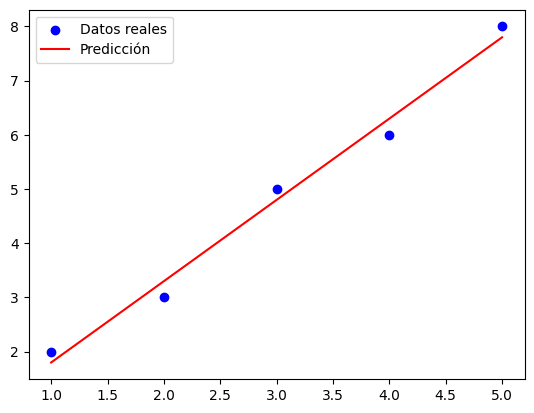

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos de ejemplo (dos variables independientes)
X = np.array([[1, 2], [2, 3], [3, 5], [4, 7], [5, 8]])  # Variables predictoras
y = np.array([2, 3, 5, 6, 8])  # Variable dependiente

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Predicciones
y_pred = modelo.predict(X)

# Mostrar coeficientes
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)

# Visualización (solo posible si una variable independiente se mantiene fija)
plt.scatter(X[:, 0], y, color="blue", label="Datos reales")
plt.plot(X[:, 0], y_pred, color="red", label="Predicción")
plt.legend()
plt.show()
